Dataset: https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

Step 1: Understanding the Problem, Data Preprocessing & Exploration (Marcus, Jhon Lawwen)
Task:
* Read the competition description and dataset details.
* Identify input features, labels, and the evaluation metric.
* Research similar classification tasks.
* Load the dataset into Google Colab.
* Handle missing values (if any), normalize/scale numerical features, encode categorical variables (if applicable).
* Perform exploratory data analysis (EDA): histograms, box plots, correlation matrix, feature importance, etc.

Deliverables:
* Colab notebook with preprocessing code and visualizations.
* A slide summarizing EDA findings.
* A slide covering dataset structure and problem statement.



---



Step 2: Model Selection & Baseline Implementation (Man Qie)
Task:
* Choose a few classic AI models (e.g., KNN, MLP, CNN etc).
* Train and evaluate basic models using cross-validation.
* Identify key hyperparameters to tune.

Deliverables:
* Colab notebook with initial model training and results.
* A slide explaining the models tested.



---



Step 3: Model Optimization & Tuning (Ji Yee)
Task:
* Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV.
* Implement feature selection or engineering if necessary.
* Compare model performances and finalize the best model.

Deliverables:
* Colab notebook with optimized models.
* A slide summarizing tuning results.



---



Step 4: Model Deployment & Performance Evaluation (Regina, Zaw)
Task:
* Assess final model using test data.
* Interpret confusion matrix, precision, recall, and F1-score.
* Ensure model generalizability and avoid overfitting.

Deliverables:
* Colab notebook with final model evaluation.
* A slide explaining performance metrics.



---



Step 5: Preparing presentation slides (Everyone)
Task:
* Compile the project into a structured report or slides.
* Ensure clarity, proper citations, and visuals.
* Coordinate with teammates for final presentation.
* Video recording for submission

Deliverables:
* Final Google Slides presentation.

Mounted at /content/drive
📌 Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  float64
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class        

<ipython-input-1-27de424d6547>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=beans, x="Class", palette="viridis", order=beans["Class"].value_counts().index)


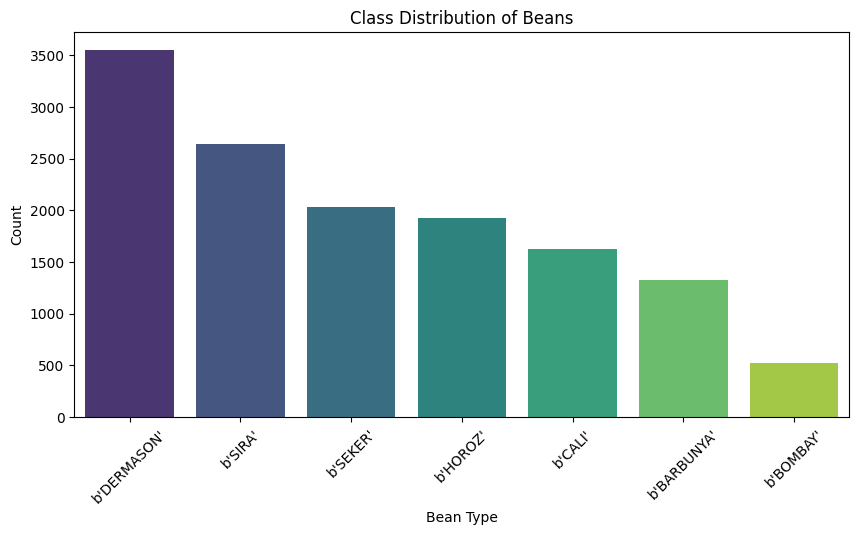

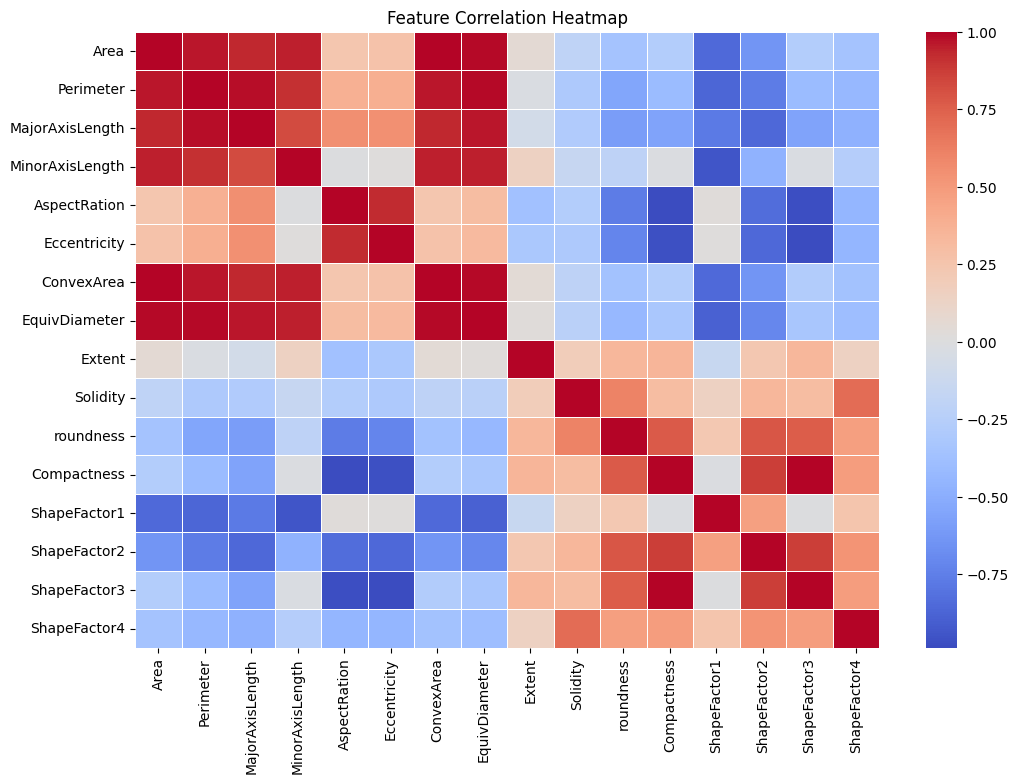

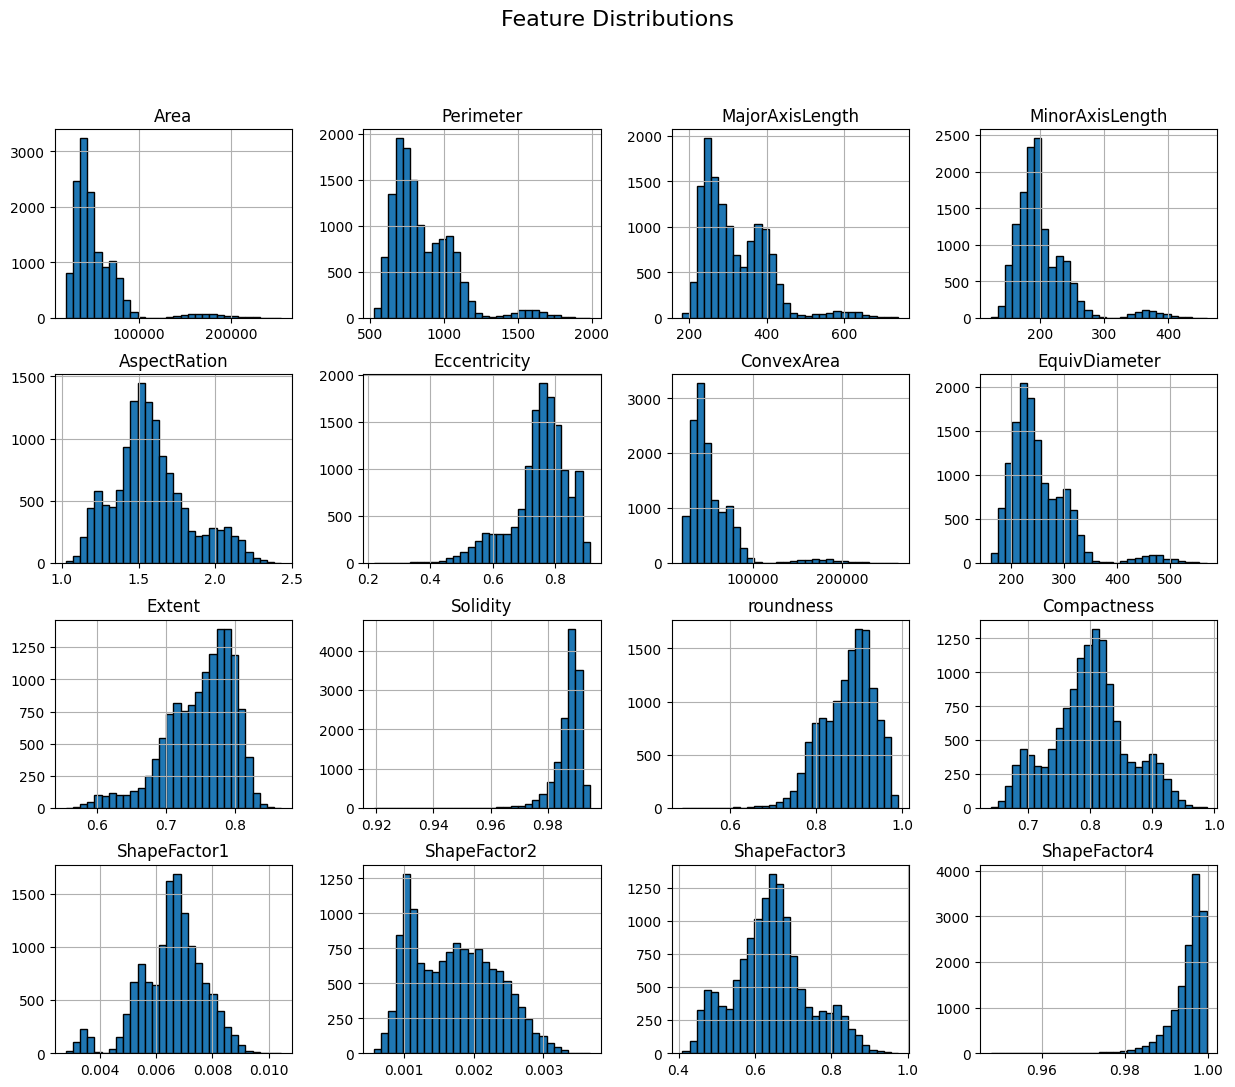

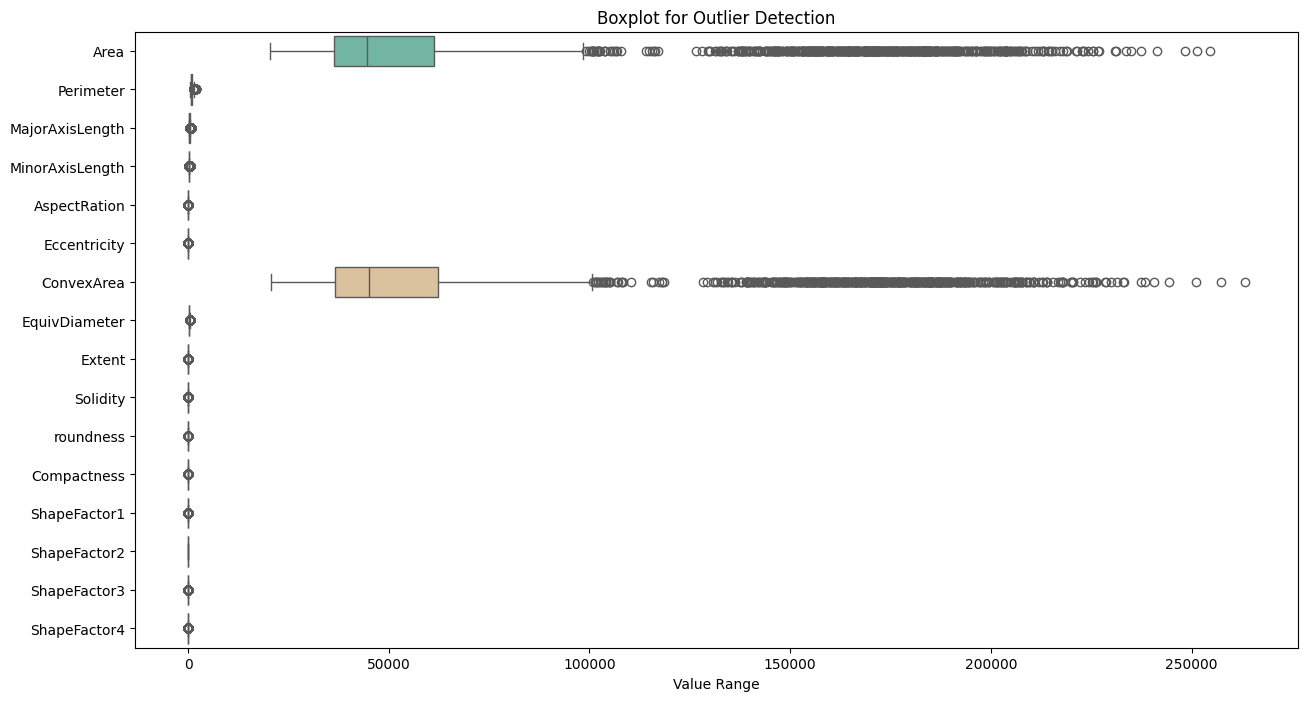

EDA Analysis Complete! Ready for preprocessing & model training.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler, LabelEncoder
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path in Google Drive (change this to your actual path)
path = "/content/drive/MyDrive/Dry_Bean_Dataset.csv"

# if got problem loading file, might be google drive issue, upload directly with
# path = "Dry_Bean_Dataset.csv"

# Load CSV file into Pandas DataFrame
beans = pd.read_csv(path)

# Show basic dataset info
print("📌 Dataset Overview")
print(beans.info())
print("\n📊 Summary Statistics")
print(beans.describe())

# Identify Features and Labels
# X = beans.drop(columns=["Class"])  # Features (all except Class)
# y = beans["Class"]  # Target variable (Class)

# Handle Missing Values
print("\n Checking for missing values...")
missing_values = beans.isnull().sum()
print(missing_values[missing_values > 0])  # Show only columns with missing values

# Remove rows with missing values (if any)
beans.dropna(inplace=True)
print(" Missing values handled.")

# Identify Features and Labels
X = beans.drop(columns=["Class"])  # Features (all except Class)
y = beans["Class"]  # Target variable (Class)

# Normalize Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Encode Categorical Target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Display class encoding mapping
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\n Class Encoding Mapping:", class_mapping)

#  1. Class Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=beans, x="Class", palette="viridis", order=beans["Class"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Class Distribution of Beans")
plt.xlabel("Bean Type")
plt.ylabel("Count")
plt.show()

#  2. Feature Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(beans.corr(numeric_only=True), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#  3. Feature Distributions (Histograms)
beans.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

#  4. Outlier Detection (Boxplots)
plt.figure(figsize=(15, 8))
sns.boxplot(data=beans.drop(columns=["Class"]), orient="h", palette="Set2")
plt.title("Boxplot for Outlier Detection")
plt.xlabel("Value Range")
plt.show()

print("EDA Analysis Complete! Ready for preprocessing & model training.")



Model Evaluation Results:


--------------------------------------------------
KNN Results:
Cross-validation accuracy: 0.919 (+/- 0.007)

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       197
           1       1.00      1.00      1.00        83
           2       0.93      0.94      0.94       240
           3       0.90      0.90      0.90       534
           4       0.97      0.96      0.96       287
           5       0.95      0.95      0.95       296
           6       0.85      0.87      0.86       405

    accuracy                           0.92      2042
   macro avg       0.93      0.93      0.93      2042
weighted avg       0.92      0.92      0.92      2042


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       198
           1       1.00      1.00      1.00        78
           2       0.91      0

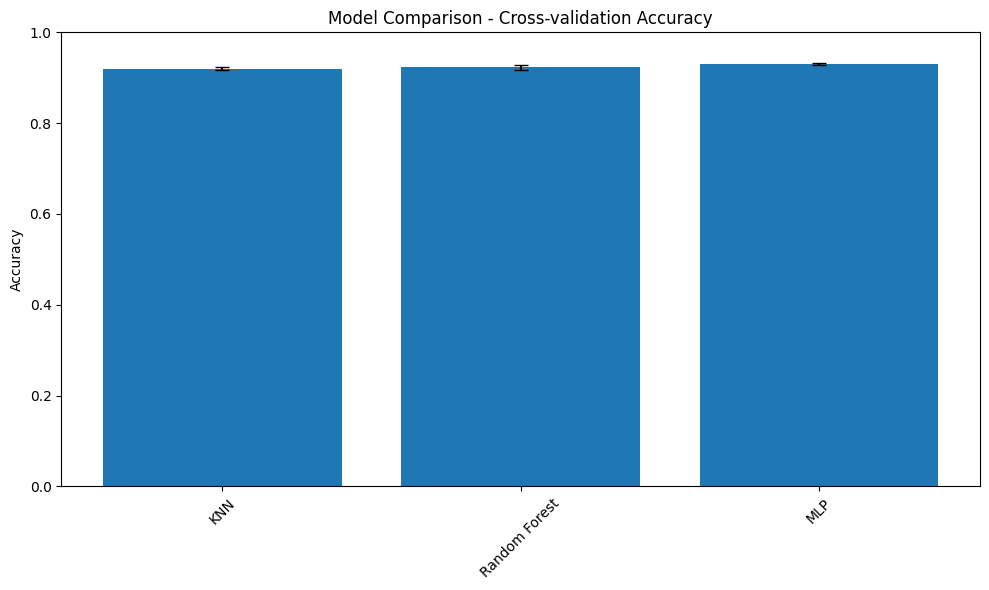

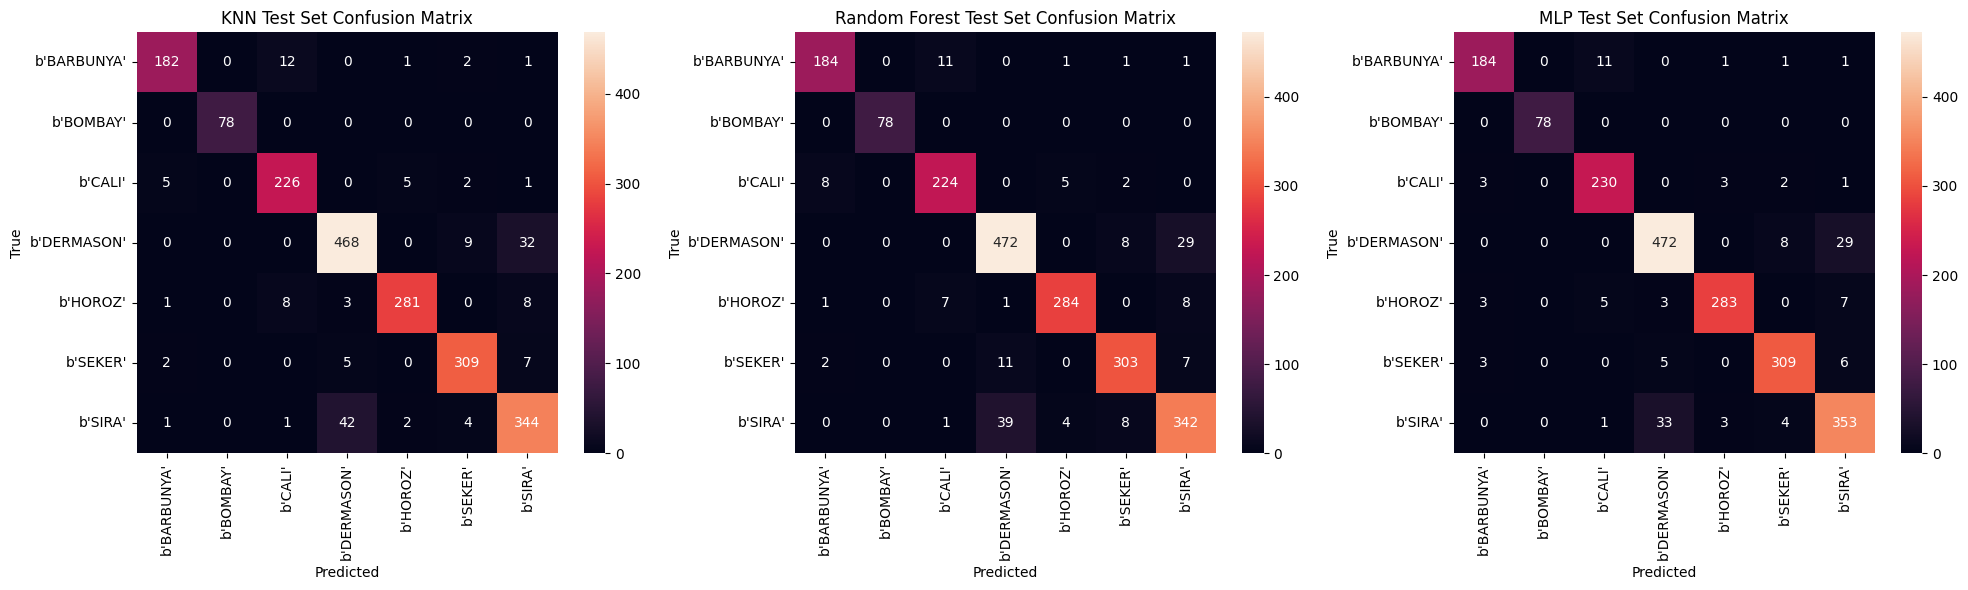

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def implement_baseline_models(X_scaled, y_encoded):
    """
    Implement and evaluate baseline models using default parameters
    """
    global X_train, X_val, X_test, y_train, y_val, y_test

    # Initialize baseline models
    models = {
        'KNN': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(random_state=42),
        'MLP': MLPClassifier(random_state=42, max_iter=1000)
    }

    # Dictionary to store results
    results = {}

    # First, split into 70% training and 30% temporary (validation + test)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_scaled, y_encoded, test_size=0.3, random_state=42
    )

    # Then, split the temporary set into 50% validation and 50% test (15% each of the original dataset)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42
    )

    print("\nModel Evaluation Results:\n")

    for name, model in models.items():
        # Perform cross-validation on training data
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)

        # Train model on training set
        model.fit(X_train, y_train)

        # Make predictions on validation set
        val_pred = model.predict(X_val)

        # Make predictions on test set
        test_pred = model.predict(X_test)

        # Store results
        results[name] = {
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'model': model,
            'val_pred': val_pred,
            'test_pred': test_pred
        }

        print(f"\n{'-'*50}")
        print(f"{name} Results:")
        print(f"Cross-validation accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
        print("\nValidation Set Classification Report:")
        print(classification_report(y_val, val_pred))
        print("\nTest Set Classification Report:")
        print(classification_report(y_test, test_pred))

    return results, X_test, y_test

def visualize_results(results, X_test, y_test, class_names):
    """
    Create visualizations for model comparison
    """
    # Model Comparison Plot
    plt.figure(figsize=(10, 6))
    cv_means = [result['cv_mean'] for result in results.values()]
    cv_stds = [result['cv_std'] for result in results.values()]
    model_names = list(results.keys())

    plt.bar(model_names, cv_means, yerr=cv_stds, capsize=5)
    plt.title('Model Comparison - Cross-validation Accuracy')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Confusion Matrices for Test Set
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    for idx, (name, result) in enumerate(results.items()):
        cm = confusion_matrix(y_test, result['test_pred'])
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx],
                   xticklabels=class_names, yticklabels=class_names)
        axes[idx].set_title(f'{name} Test Set Confusion Matrix')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('True')

    plt.tight_layout()
    plt.show()

    # Run baseline implementation
results, X_test, y_test = implement_baseline_models(X_scaled, y_encoded)

# Create visualizations
visualize_results(results, X_test, y_test, le.classes_)

In [5]:
# Step 3 code goes here

#Hyperparameter tuning with gridCV/RadomizedSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Example: Hyperparameter tuning for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#used radomized search CV instead of Grid search cv to speed up data processing
grid_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_grid, cv=5, n_iter=20, n_jobs=-1)
grid_search.fit(X_scaled, y_encoded)

print("Best Parameters for RandomForest:", grid_search.best_params_)

#Feature selection using SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=8)  # Select top 8 features
X_selected = selector.fit_transform(X_scaled, y_encoded)

print("Selected Features:", X.columns[selector.get_support()])

#Compare performance of Optimized models
from sklearn.metrics import classification_report

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Classification Report for Optimized RandomForest:")
print(classification_report(y_test, y_pred))


Best Parameters for RandomForest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None}
Selected Features: Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea',
       'EquivDiameter', 'ShapeFactor1', 'ShapeFactor2'],
      dtype='object')
Classification Report for Optimized RandomForest:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       198
           1       1.00      1.00      1.00        78
           2       0.94      0.98      0.96       239
           3       0.96      0.97      0.97       509
           4       0.98      0.96      0.97       301
           5       0.97      0.97      0.97       323
           6       0.95      0.95      0.95       394

    accuracy                           0.96      2042
   macro avg       0.97      0.97      0.97      2042
weighted avg       0.96      0.96      0.96      2042



In [6]:
#turning for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, n_jobs=-1)
knn_grid.fit(X_scaled, y_encoded)

best_knn = knn_grid.best_estimator_
print("Best KNN Accuracy:", knn_grid.best_score_)


Best KNN Accuracy: 0.8591662769835857


In [7]:
#tuning for MLP
mlp_param_grid = {
    'hidden_layer_sizes': [(50,50), (100,), (100,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

mlp_grid = GridSearchCV(MLPClassifier(random_state=42, max_iter=1000), mlp_param_grid, cv=5, n_jobs=-1)
mlp_grid.fit(X_scaled, y_encoded)

best_mlp = mlp_grid.best_estimator_
print("Best MLP Accuracy:", mlp_grid.best_score_)


Best MLP Accuracy: 0.857479554118008


In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate Random Forest
y_rf_pred = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print("\nRandomForest Test Accuracy:", rf_accuracy)

# Evaluate KNN
y_knn_pred = best_knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_knn_pred)
print("\nKNN Test Accuracy:", knn_accuracy)

# Evaluate MLP
y_mlp_pred = best_mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, y_mlp_pred)
print("\nMLP Test Accuracy:", mlp_accuracy)

# Compare all three
print("\nModel Comparison:")
print(f"RandomForest Accuracy: {rf_accuracy:.4f}")
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"MLP Accuracy: {mlp_accuracy:.4f}")



RandomForest Test Accuracy: 0.9647404505386875

KNN Test Accuracy: 0.9382957884427032

MLP Test Accuracy: 0.9280117531831538

Model Comparison:
RandomForest Accuracy: 0.9647
KNN Accuracy: 0.9383
MLP Accuracy: 0.9280


In [9]:
# Step 4 code goes here

# Identify the best model based on test accuracy
model_accuracies = {
    "Random Forest": rf_accuracy,
    "KNN": knn_accuracy,
    "MLP": mlp_accuracy
}

# Determine the best model name
best_model_name = max(model_accuracies, key=model_accuracies.get)
print(f"\n🏆 Best Model: {best_model_name}")

# Assign the best model dynamically
if best_model_name == "Random Forest":
    best_model = best_rf
elif best_model_name == "KNN":
    best_model = best_knn
else:
    best_model = best_mlp

# Make predictions on the test data
y_pred = best_model.predict(X_test)





🏆 Best Model: Random Forest



📌 Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       198
           1       1.00      1.00      1.00        78
           2       0.94      0.98      0.96       239
           3       0.96      0.97      0.97       509
           4       0.98      0.96      0.97       301
           5       0.97      0.97      0.97       323
           6       0.95      0.95      0.95       394

    accuracy                           0.96      2042
   macro avg       0.97      0.97      0.97      2042
weighted avg       0.96      0.96      0.96      2042


🟩 Confusion Matrix for Random Forest:
[[188   0   8   0   1   1   0]
 [  0  78   0   0   0   0   0]
 [  1   0 234   0   2   2   0]
 [  0   0   0 495   0   5   9]
 [  1   0   6   1 288   0   5]
 [  2   0   0   3   0 314   4]
 [  0   0   1  15   2   3 373]]


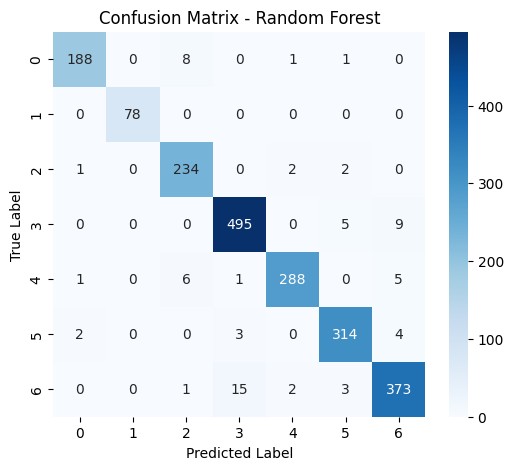

In [10]:
# Detailed Performance Metrics for Best Model
# Print classification report
print(f"\n📌 Classification Report for {best_model_name}:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"\n🟩 Confusion Matrix for {best_model_name}:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


In [11]:
# Check for Overfitting

best_model.fit(X_train, y_train)

# Train Accuracy
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))

test_accuracy = model_accuracies.get(best_model_name, None)

if test_accuracy is None:
    print("\n❌ Error: Best model name not found in model_accuracies dictionary.")
else:
    print(f"\n📌 Training Accuracy: {train_accuracy:.4f}")
    print(f"📌 Test Accuracy: {test_accuracy:.4f}")

    # Check for overfitting
    if train_accuracy - test_accuracy > 0.05:
        print("\n⚠️ Warning: Possible Overfitting! The model performs significantly better on training data.")
    else:
        print("\n✅ No major overfitting detected.")



📌 Training Accuracy: 0.9679
📌 Test Accuracy: 0.9647

✅ No major overfitting detected.


In [12]:
# Cross-Validation to Check Generalization
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"\n📊 Cross-validation Scores for {best_model_name}: {cv_scores}")
print(f"📌 Mean CV Accuracy: {cv_scores.mean():.4f}")


📊 Cross-validation Scores for Random Forest: [0.9296957  0.92812172 0.91653543 0.91548556 0.92073491]
📌 Mean CV Accuracy: 0.9221


In [ ]:
# misc